In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import polars as pl
from transformers import GPTNeoXForCausalLM, AutoTokenizer
from sklearn.linear_model import LogisticRegression

import numpy as np

In [3]:
from matplotlib.font_manager import fontManager, FontProperties

path = "helvetica.ttf"
fontManager.addfont(path)

prop = FontProperties(fname=path)
sns.set(font=prop.get_name())

from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib
plt.rcParams['font.size']=20.
plt.rcParams['axes.labelsize']=20.
plt.rcParams['axes.titlesize']=22.
plt.rcParams['legend.fontsize']=18.
plt.rcParams['savefig.dpi']=1000
plt.rcParams['xtick.labelsize']=17.
plt.rcParams['ytick.labelsize']=17.
plt.rcParams['xtick.minor.size']=3
plt.rcParams['xtick.major.size']=5
plt.rcParams['ytick.minor.size']=3
plt.rcParams['ytick.major.size']=5
plt.rcParams['xtick.major.width']=1.
plt.rcParams['xtick.minor.width']=1.
plt.rcParams['ytick.major.width']=1.
plt.rcParams['ytick.minor.width']=1.
plt.rcParams['axes.linewidth']=2.
plt.rcParams['axes.unicode_minus'] = False

In [4]:

["index"] + [f"match{2**i}" for i in range(0, 9)]
all_dfs = []
for i in range(100, 111):
    df = pl.scan_csv(f"../results/memorization-dyn-count/evals-running/memorization_amber_{i}_100/*.csv", has_header=False, new_columns = ["index", "longest_match", "overlap", "lev"])
    # df["index"] = df["index"].cast(pl.Int64)
    df = df.with_columns(checkpoint = pl.lit(i))
    all_dfs.append(df)
all_dfs = pl.concat(all_dfs)

In [5]:
d = all_dfs.collect().pivot("lev", "index", "checkpoint", aggregate_function="mean")
dyn = d.to_numpy()[:, 1:]

In [6]:
lower = dyn[np.min(dyn, axis=1) < 40, :]

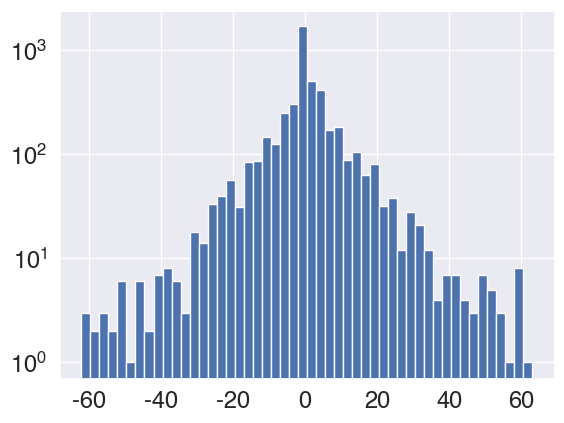

In [7]:
plt.hist(lower[:, 5] - lower[:, 3], bins=50)
plt.yscale('log')

In [8]:
x = lower[:, 1:] - lower[:, :-1]
cov_matrix = np.cov(x.T)
var = np.sqrt(np.var(x, axis=0))

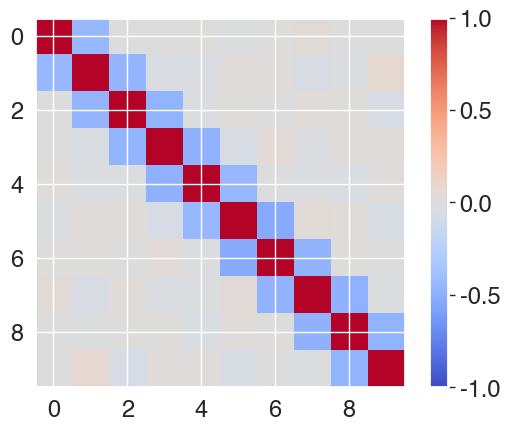

In [9]:
f, ax = plt.subplots()
h = ax.imshow(cov_matrix / (var * var[:, None]), vmin=-1.0, vmax=1.0, cmap='coolwarm')
f.colorbar(h)
f.savefig("../figures/correlation.pdf")


In [11]:
df = pd.read_parquet('../results/analysis-amber.parquet.gzip')
df = df[df.groupby(df.index.get_level_values(0)).transform("max")["cumsum30"] == 1]
indices = df.index.get_level_values(0).unique()
x = dyn[(indices//40)]

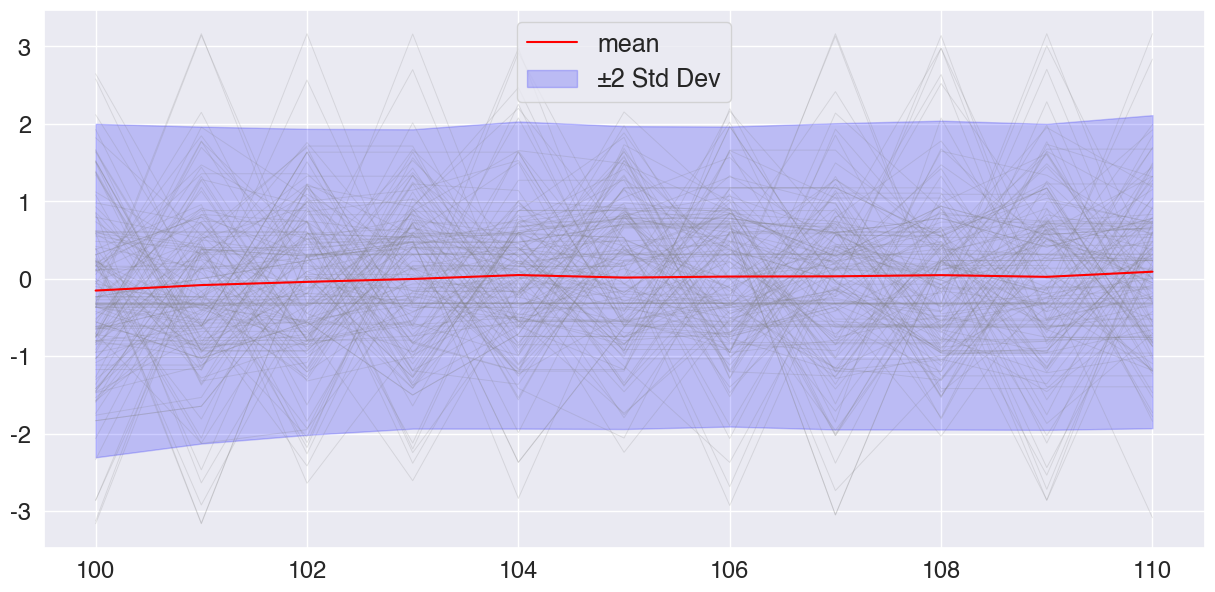

In [14]:
f, ax = plt.subplots(figsize=(15, 7))
x = (x - np.mean(x, axis=1)[:, None]) / np.std(x, axis=1)[:, None]
x = x[np.std(x, axis=1) != 0]
indices = np.random.choice(x.shape[0], 150)
m = np.mean(x, 0)
plt.plot(np.arange(len(m))+100, x[indices, :].T, color='grey', alpha=0.2, linewidth=0.7);

s = np.std(x, 0)
plt.plot(np.arange(len(m))+100, m, c='red', label="mean")
plt.fill_between(np.arange(len(m))+100, 
                 m - s*2, 
                 m + s*2, 
                 color='blue', alpha=0.2, label='±2 Std Dev')
plt.legend()
plt.savefig("../figures/amber/results.pdf")
# plt.plot(x.mea

In [32]:
m

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan])

In [9]:
import scipy.signal
corr = scipy.signal.correlate(lower, lower)

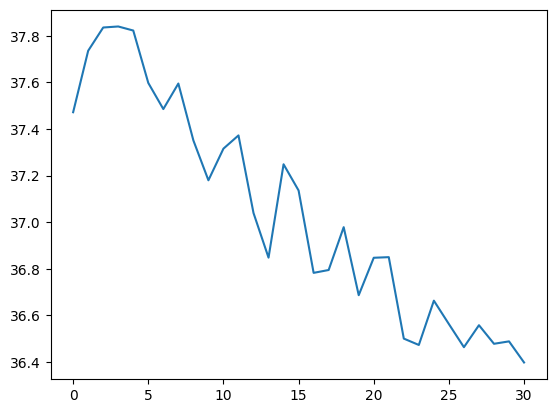

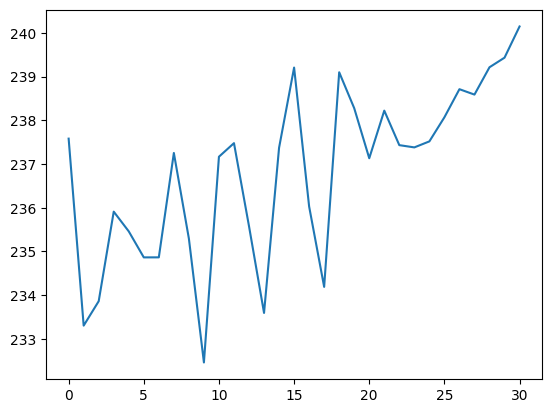

In [16]:
plt.plot(np.mean(lower, 0))
plt.figure()
plt.plot(np.var(lower, 0))

In [10]:
x = lower - np.mean(lower, axis=1)[:, None]
x = x / np.sqrt(np.maximum(np.var(x, axis=1)[:, None], 1))

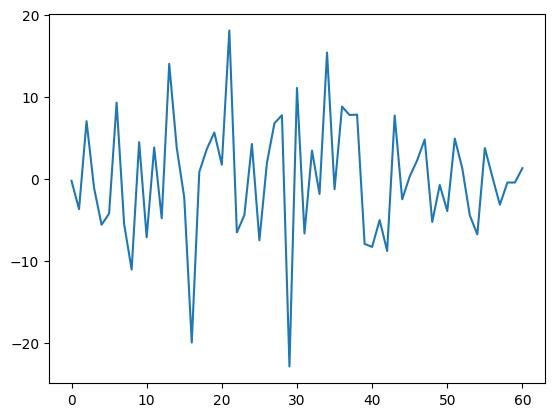

In [11]:
plt.plot(scipy.signal.correlate(x, x)[3])

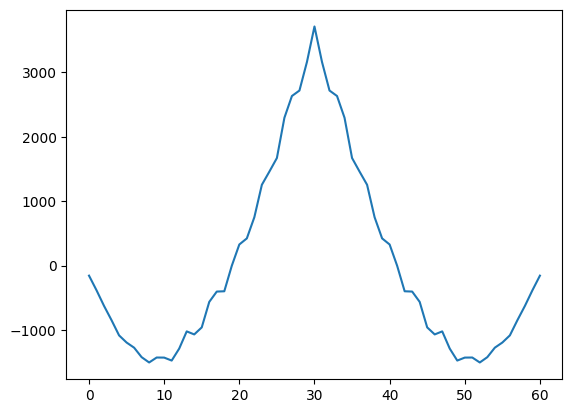

In [12]:
plt.plot(np.mean(scipy.signal.correlate(x, x), 0))

In [77]:
np.mean(corr, 0)

array([6.03653517e+07, 1.21139264e+08, 1.82209024e+08, 2.43131050e+08,
       3.04188887e+08, 3.65048380e+08, 4.25410609e+08, 4.85995727e+08,
       5.46768268e+08, 6.07259276e+08, 6.67703493e+08, 7.28726345e+08,
       7.88909753e+08, 8.48753087e+08, 9.09834036e+08, 9.70929601e+08,
       1.03078049e+09, 1.09096000e+09, 1.15199888e+09, 1.21247287e+09,
       1.27296638e+09, 1.33375415e+09, 1.39439226e+09, 1.45478799e+09,
       1.51567317e+09, 1.57679126e+09, 1.63776537e+09, 1.69886338e+09,
       1.75968908e+09, 1.82009943e+09, 1.75968908e+09, 1.69886338e+09,
       1.63776537e+09, 1.57679126e+09, 1.51567317e+09, 1.45478799e+09,
       1.39439226e+09, 1.33375415e+09, 1.27296638e+09, 1.21247287e+09,
       1.15199888e+09, 1.09096000e+09, 1.03078049e+09, 9.70929601e+08,
       9.09834036e+08, 8.48753087e+08, 7.88909753e+08, 7.28726345e+08,
       6.67703493e+08, 6.07259276e+08, 5.46768268e+08, 4.85995727e+08,
       4.25410609e+08, 3.65048380e+08, 3.04188887e+08, 2.43131050e+08,
      

In [82]:
import statsmodels.tsa.stattools as ts
from tqdm import tqdm
data = lower[np.max(np.abs(lower - np.mean(lower, axis=1)[:, None]), axis=1) > 1]
indices = np.random.choice(len(data), 1000)
# Perform the ADF test
adf_stat = []
prob = []
for x in tqdm(data[indices]):
    if np.max(np.abs(x - np.mean(x))) < 1:
        continue
    result = ts.adfuller(x)
    adf_stat.append(result[0])
    prob.append(result[1])

  0%|          | 0/1000 [00:00<?, ?it/s]/om2/user/sunnyd/anaconda/envs/pythia/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:958: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
  8%|▊         | 85/1000 [00:00<00:02, 417.75it/s]/om2/user/sunnyd/anaconda/envs/pythia/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:958: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
 17%|█▋        | 170/1000 [00:00<00:01, 418.60it/s]/om2/user/sunnyd/anaconda/envs/pythia/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:958: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
 68%|██████▊   | 685/1000 [00:01<00:00, 419.79it/s]/om2/user/sunnyd/anaconda/envs/pythia/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:958: RuntimeWarning: 

In [94]:
np.sum(np.array(prob) > 0.05)

213

/tmp/ipykernel_2549518/2957606271.py:3: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(1e-5, 0)


(1e-05, 1.2840254166877416)

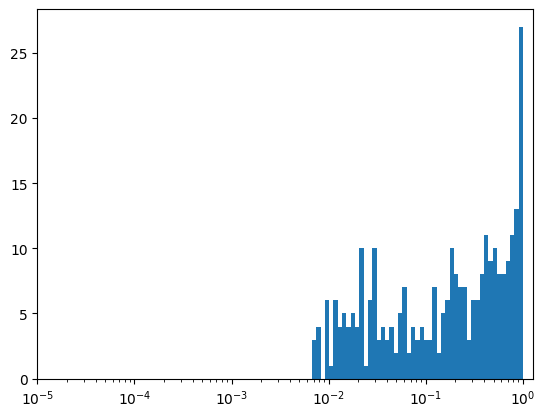

In [89]:
plt.hist(prob, bins=np.exp(np.linspace(-5, 0, 50)))
plt.xscale("log")
plt.xlim(1e-5, 0)

(array([23., 25., 28., 28., 33., 35., 45., 32., 37., 34., 28., 33., 34.,
        27., 29., 27., 16., 25., 26., 24., 22., 13., 14., 18., 15., 13.,
        12., 14., 10., 17., 18., 13.,  9., 10.,  8., 12.,  7.,  9.,  8.,
         9.,  1.,  4.,  7.,  5.,  2.,  4.,  2.,  1.,  3.]),
 array([-6.        , -5.87755102, -5.75510204, -5.63265306, -5.51020408,
        -5.3877551 , -5.26530612, -5.14285714, -5.02040816, -4.89795918,
        -4.7755102 , -4.65306122, -4.53061224, -4.40816327, -4.28571429,
        -4.16326531, -4.04081633, -3.91836735, -3.79591837, -3.67346939,
        -3.55102041, -3.42857143, -3.30612245, -3.18367347, -3.06122449,
        -2.93877551, -2.81632653, -2.69387755, -2.57142857, -2.44897959,
        -2.32653061, -2.20408163, -2.08163265, -1.95918367, -1.83673469,
        -1.71428571, -1.59183673, -1.46938776, -1.34693878, -1.2244898 ,
        -1.10204082, -0.97959184, -0.85714286, -0.73469388, -0.6122449 ,
        -0.48979592, -0.36734694, -0.24489796, -0.12244898,  0. 

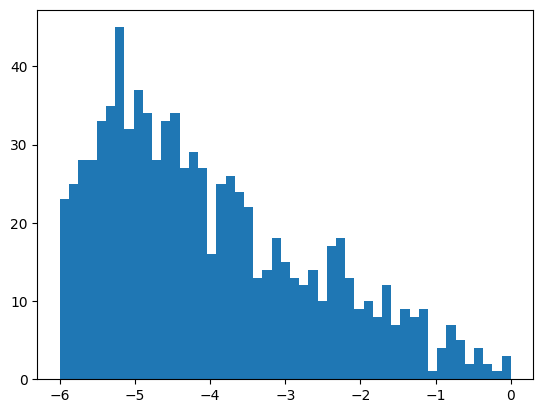

In [80]:
plt.hist(adf_stat, bins=np.linspace(-6.0, 0.0, 50))

In [ ]:
# REPEAT WITH Unique strings